# Sound Testing

> Sound Testing


- skip_showdoc: true
- skip_exec: true


## ✅ Overview: What You'll Do

1. Record audio from the mic  
2. Visualize the waveform  
3. Play it back  
4. (Optional) Run basic analysis (volume, noise floor, frequency)

---

## 🧰 1. **Install Required Python Libraries**

```bash
pip install sounddevice numpy scipy matplotlib ipython
```

> These tools use your system’s microphone input and work across platforms.

---

## 🎙️ 2. **Record Audio from Microphone in Jupyter**

In [ ]:
import sounddevice as sd

print("Available audio input devices:")
devices = sd.query_devices()

for i, device in enumerate(devices):
    if device['max_input_channels'] > 0:
        print(f"[{i}] {device['name']} — {device['hostapi']}")


Available audio input devices:
[0] UM02: USB Audio (hw:1,0) — 0
[5] HD-Audio Generic: ALC897 Analog (hw:3,0) — 0
[7] HD-Audio Generic: ALC897 Alt Analog (hw:3,2) — 0
[8] UGREEN camera 2K: USB Audio (hw:4,0) — 0


In [ ]:

import sounddevice as sd
import numpy as np
from scipy.io.wavfile import write

# Recording parameters
samplerate = 44100  # Hz
duration = 5        # seconds

print("Recording...")
recording = sd.rec(int(samplerate * duration), samplerate=samplerate, channels=1)
sd.wait()
print("Recording complete.")

# Save to WAV file
write("mic_test.wav", samplerate, recording)

Recording...
Recording complete.


✅ You now have a 5-second recording from your default microphone.

---

## 📊 3. **Visualize the Audio Waveform**

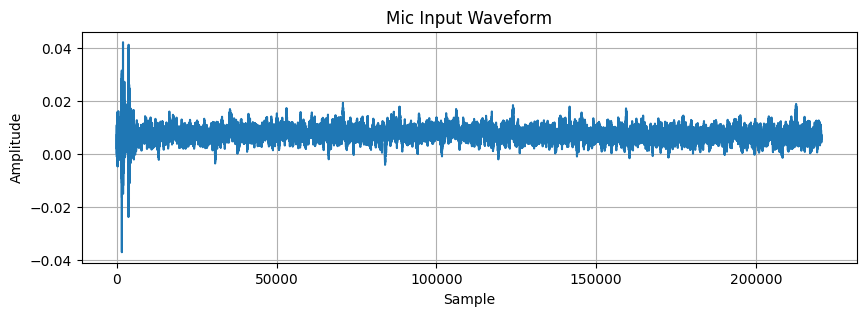

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.plot(recording)
plt.title("Mic Input Waveform")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


> Look for spikes (speech), flatlines (silence), and background noise.

---

## 🔊 4. **Playback in Notebook (Optional)**

In [ ]:

from IPython.display import Audio

Audio("mic_test.wav")


> 🎧 This plays your mic test right in the notebook.

---

## 🧪 5. **Basic Mic Quality Metrics**

### RMS Volume:

In [ ]:

rms = np.sqrt(np.mean(recording**2))
print(f"RMS Volume: {rms:.4f}")


RMS Volume: 0.0079


### Noise Floor Estimate (first second):

In [ ]:

noise_sample = recording[:samplerate]  # First 1 second
noise_rms = np.sqrt(np.mean(noise_sample**2))
print(f"Estimated Noise Floor: {noise_rms:.4f}")


Estimated Noise Floor: 0.0082


---

## 🧠 Advanced Options (Optional)

| Task                       | Tool / Method                           |
|----------------------------|-----------------------------------------|
| Plot frequency spectrum    | Use FFT via `numpy.fft.fft`             |
| Record stereo or longer    | Change `channels=2` or `duration=10`    |
| Test multiple mics         | Use `sd.query_devices()` and `device=...` |
| Clean noise                | Use `scipy.signal`, `librosa`, or `noisereduce` |
| Transcribe speech          | Use `speech_recognition` or `whisper`   |

---

## 📋 Summary Workflow

```plaintext
1. 🎙️ Record with sounddevice
2. 📦 Save as WAV
3. 📊 Plot waveform
4. 🔊 Playback with IPython
5. 🧪 Measure volume / noise
```

---

Would you like:
- A downloadable Jupyter notebook template for mic testing?
- A version that tests and compares **multiple microphones** side-by-side?

Let me know how deep you want to go — I can add frequency analysis or even ML-based speech quality scores!